In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit



@njit
def generer_tableau(ratio,size):
    nb = int(size*size*ratio)
    a = np.zeros(size*size)
    arr = np.arange(size*size)
    np.random.shuffle(arr)
    a[arr[:nb]]=1
    return a.reshape((size, size))


import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange

@njit
def generer_tableau(ratio, size):
    nb = int(size * size * ratio)
    a = np.zeros(size * size)
    arr = np.arange(size * size)
    np.random.shuffle(arr)
    a[arr[:nb]] = 1
    return a.reshape((size, size))


@njit
def calcul_DE(tableau, x, y, size):
    if x == 0 or x == size - 1 or y == 0 or y == size - 1:
        extended_tab = np.zeros((size + 2, size + 2))
        extended_tab[1:size + 1, 1:size + 1] = tableau
        extended_tab[0, 1:size + 1] = tableau[-1]
        extended_tab[-1, 1:size + 1] = tableau[0]
        extended_tab[1:size + 1, 0] = tableau[:, size - 1]
        extended_tab[1:size + 1, size + 1] = tableau[:, 0]
        table_locale = extended_tab[x:x + 3, y:y + 3]
        o = table_locale[1, 1] * 2 - 1
        a = table_locale[0, 1] * 2 - 1
        b = table_locale[1, 0] * 2 - 1
        c = table_locale[1, 2] * 2 - 1
        d = table_locale[2, 1] * 2 - 1
    else:
        table_locale = tableau[x - 1:x + 2, y - 1:y + 2]
        o = table_locale[1, 1] * 2 - 1
        a = table_locale[0, 1] * 2 - 1
        b = table_locale[1, 0] * 2 - 1
        c = table_locale[1, 2] * 2 - 1
        d = table_locale[2, 1] * 2 - 1
    return 2 * o * (a + b + c + d)


@njit
def new_point_parallel(tableau, size, exp_values,nb_pas):
    for _ in prange(size * size * nb_pas):
        coordx = np.random.randint(size)
        coordy = np.random.randint(size)
        DE = calcul_DE(tableau, coordx, coordy, size)
        if test_precomputed(DE, exp_values):
            tableau[coordx, coordy] = not tableau[coordx, coordy]
    return tableau


@njit
def precomputed_exp_values(T):
    return np.array([np.exp(-4 / T), np.exp(-8 / T)])


@njit
def test_precomputed(DE, exp_values):
    if DE == 0 or DE == -4 or DE == -8:
        return True
    if DE == 4 or DE == 8:
        x = np.random.rand()
        return x < exp_values[int(DE / 4 - 1)]
    else:
        print("erreur, DE = ", DE)
        return False



@njit
def M(tableau, size):
    totplus = np.sum(tableau)

    return abs(-1 * (size * size - totplus) + totplus) / (size * size)


0.25


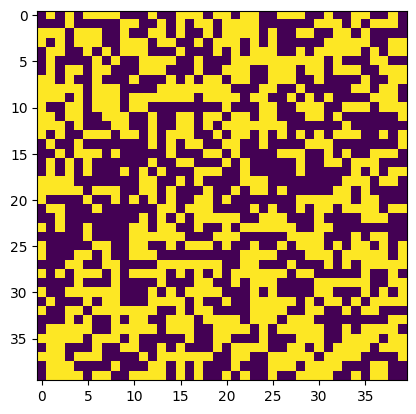

SystemError: ignored

In [21]:
tab = generer_tableau(0.5, 40)
ratio_cases = 0.25
size = 40
nb_pas = 300
T_liste = np.linspace(0.25, 4, 16)
Mliste=[]
for T in T_liste:
    print(T)
    plt.imshow(tab)
    plt.show()
    exp_values = precomputed_exp_values(T)
    for k in range(1000):
        tab = generer_tableau(ratio_cases, size)
        tab = new_point_parallel(tab, size, exp_values,nb_pas)
        Mliste.append(np.sum(tab))


Mliste = (np.abs(np.array(Mliste)-800)*2)/1600

np.save('new_data_accelerated.npy',Mliste)
plt.figure(figsize=[7.5,6])
plt.scatter(np.arange(len(Mliste)),Mliste,s=0.2)
plt.ylabel(r'$\frac{|M|}{Mmax}$',size = 25)
plt.grid()
plt.title("Nouvelles données issus de la simulation accélérées par CPU",size = 15)
plt.savefig('new_data_accelerated.jpg',dpi =300)